In [2]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [3]:
import pickle
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.backend import clear_session


In [4]:
path_data = "/content/gdrive/MyDrive/BK-DATN/data_final_23616.pkl"
with open(path_data, 'rb') as f:
    list_data = pickle.load(f)

In [5]:
print(len(list_data))
print(list_data[3])
MIST_bag = 23616

21192
['50042c8722f85fa1b27d6c8d1def0b78708fd1b0c8a3b82996551df0d22cc492', [[35, 3], [62, 1], [261, 1], [282, 1], [371, 1], [399, 2], [450, 1], [541, 1], [698, 1], [711, 1], [848, 1], [865, 3], [1012, 2], [1023, 2], [1198, 8], [1205, 1], [1354, 1], [1370, 1], [1399, 12], [1432, 1], [1543, 1], [1598, 1], [1599, 2], [1656, 1], [1731, 1], [1782, 1], [2003, 4], [2016, 1], [2030, 23], [2058, 1], [2066, 2], [2087, 5], [2092, 114], [2225, 3], [2252, 1], [2507, 1], [2552, 2], [2700, 1], [2753, 1], [2764, 5], [2790, 1], [2864, 1], [2952, 96], [3173, 1], [3307, 76], [3559, 2], [3563, 2], [3566, 1], [3664, 1], [3693, 1], [3739, 69], [3927, 1], [4046, 23], [4097, 1], [4187, 1], [4227, 2], [4239, 2], [4324, 2], [4331, 3], [4463, 10], [4548, 1], [4595, 65], [4603, 1], [4616, 19], [4624, 9], [4776, 1], [4832, 52], [4940, 1], [5146, 1], [5167, 2], [5228, 14], [5500, 14], [5798, 1], [5828, 40], [5854, 2], [5915, 5], [5974, 3], [6095, 2], [6151, 4], [6330, 2], [6342, 1], [6400, 1], [6544, 2], [6595, 2],

In [ ]:
#@title
# get data
X = []
y = []

max_padding = 0
for data in list_data:
    if len(data[1])*2 > max_padding:
        max_padding = len(data[1])*2

print(f"len vector : {max_padding}")
for data in list_data[0:15000]:
    temp_value = []
    for value in data[1]:
        temp_value.append(value[0])
        temp_value.append(value[1])
    while len(temp_value) < max_padding:
        temp_value.append(0)
    X.append(temp_value)
    y.append(data[2])
  
TrainX, TrainY = np.array(X), np.array(y)
X.clear()
y.clear()
list_data.clear()


In [ ]:
#@title
# get data
X = []
y = []
choose_tag_index = [22, 26, 29, 40, 47, 59, 67, 68, 71, 88, 101, 105, 115, 120, 122, 123, 124, 125, 126, 130, 138, 147, 151, 161]
max_padding = 0
for data in list_data:
    total = 0
    for 
    if len(data[1]) > max_padding:
        max_padding = len(data[1])

print(f"len vector : {max_padding}")
for data in list_data[0:18000]:
    temp_value = []
    for value in data[1]:
        temp_value.append(value[0])
        #temp_value.append(value[1])
    while len(temp_value) < max_padding:
        temp_value.append(0)
    X.append(temp_value.copy())
    temp_value.clear()
    tag = []
    for tag_index in choose_tag_index:
        tag.append(data[2][tag_index])
    y.append(tag.copy())
  
TrainX, TrainY = np.array(X), np.array(y)
X.clear()
y.clear()
list_data.clear()


In [6]:
# get data
X = []
y = []
#choose_tag_index = [29, 47, 59, 67, 68, 71, 88, 101, 105, 115, 122, 123, 124, 125, 126, 147, 151] [59, 68, 88, 101, 105, 115, 122, 125, 126, 147, 151]
choose_tag_index =  [59, 68, 88, 101, 105, 115, 122, 125, 147, 151] # [68, 88, 101, 105, 125, 126, 147, 151] # [59, 68, 88, 101, 105, 122, 125, 126, 147, 151]
def unzip_mist(data,MIST_bag ):
    temp_value = [0]*MIST_bag
    for value in data:
        temp_value[value[0]] = value[1]
    return temp_value
for i,data in enumerate(list_data[0:18000]):
    #print(i)
    X.append(unzip_mist(data[1], MIST_bag))
    tag = []
    for tag_index in choose_tag_index:
        tag.append(data[2][tag_index])
    y.append(tag)
TrainX, TrainY = np.array(X.copy()), np.array(y.copy())
list_data.clear()
X.clear()
y.clear()


In [7]:
print(sum(TrainX[0]))
print(sum(TrainX[1]))
print(sum(TrainX[2]))
print(sum(TrainY[:,3]))
print(TrainY[2])
print(TrainY[3])
print(TrainX.shape)

14748
15497
13506
6656
[1 1 1 0 0 1 1 1 0 0]
[1 1 1 0 0 1 1 1 0 0]
(18000, 23616)


In [8]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X_train, y_train, savepath):
	results = list()
	n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
	# define evaluation procedure
	# enumerate folds
	# prepare data

	print(f"Train : {len(X_train)}  samples")
	# define model
	model = get_model(n_inputs, n_outputs)
	model_json = model.to_json()
	param = model.count_params()
	model.summary()
	# fit model
	epochs = 200
	batch_size = 64
	with open(f"{savepath}param_{param}_model_eps_{epochs}_bz_{batch_size}.json", "w") as json_file:
			json_file.write(model_json)
		
	callbacks = [ModelCheckpoint(f"{savepath}param_{param}_bz_{batch_size}"+"good_model_loss_{loss: .5f}_acc_{val_categorical_accuracy: .4f}"+".hdf5", monitor = "val_categorical_accuracy", save_best_only = True, mode = "max"), ReduceLROnPlateau(monitor='loss', patience=20, verbose=1, factor=0.1, min_lr=0.0000001)]
	history = model.fit(X_train, y_train, verbose=1, epochs=epochs, batch_size=batch_size, callbacks = callbacks, validation_split=0.3)
		
	acc_train = history.history['categorical_accuracy']
	acc_val = history.history['val_categorical_accuracy']
	N_epochs = range(1,epochs+1)
	plt.plot(N_epochs, acc_train, 'b', label='Training accuracy')
	plt.plot(N_epochs, acc_val, 'm', label='validation accuracy')
	plt.title('Training and Validation accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.legend()
	plt.show()
	plt.savefig(f"{savepath}param_{param}_bz_{batch_size}_accuracy.png", dpi = 300)
 
	loss_train = history.history['loss']
	loss_val = history.history['val_loss']
	N_epochs = range(1,epochs+1)
	plt.plot(N_epochs, loss_train, 'g', label='Training loss')
	plt.plot(N_epochs, loss_val, 'r', label='validation loss')
	plt.title('Training and Validation loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.legend()
	plt.show()
	plt.savefig(f"{savepath}param_{param}_bz_{batch_size}_loss.png", dpi = 300)
 
	return 0

**Mô hình tốt nhất, acc 73,89% - epoch 67**

In [ ]:
# get the model [59, 68, 88, 101, 105, 122, 125, 126, 147, 151]
def get_model(n_inputs, n_outputs):
	clear_session()
	model = Sequential()
	model.add(Dense(256, input_dim=n_inputs, activation='relu'))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
	return model


savepath = "/content/gdrive/MyDrive/BK-DATN/save_model/"
results = evaluate_model(TrainX, TrainY, savepath)

Train : 18000  samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6045952   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6,080,138
Trainable params: 6,080,138
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
197/197 [==============================] - 5s 19ms/step - loss: 0.3223 - categorical_accuracy: 0.2595 - val_loss: 0.6767 - val_categorical_accuracy: 0.3161 - lr: 0.0010
Epoch 2/200
197/197 [==============================] - 3s 14ms/step - loss: 0.1147 - categorical_accuracy:

Train : 18000  samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6079744   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6,113,930
Trainable params: 6,113,930
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
197/197 [==============================] - 5s 19ms/step - loss: 0.3104 - categorical_accuracy: 0.0860 - val_loss: 0.6022 - val_categorical_accuracy: 0.3215 - lr: 0.0010
Epoch 2/200
197/197 [==============================] - 3s 14ms/step - loss: 0.1192 - categorical_accuracy:

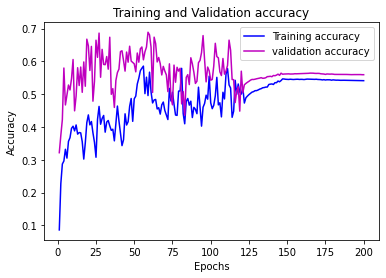

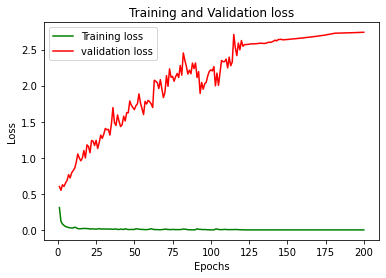

<Figure size 432x288 with 0 Axes>

In [8]:
#@title
# get the model [59, 68, 88, 101, 105, 122, 125, 126, 147, 151]
def get_model(n_inputs, n_outputs):
	clear_session()
	model = Sequential()
	model.add(Dense(256, input_dim=n_inputs, activation='relu'))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
	return model


savepath = "/content/gdrive/MyDrive/BK-DATN/save_model/"
results = evaluate_model(TrainX, TrainY, savepath)

Train : 18000  samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6079744   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6,113,930
Trainable params: 6,113,930
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
197/197 [==============================] - 5s 20ms/step - loss: 0.3894 - categorical_accuracy: 0.3324 - val_loss: 0.5661 - val_categorical_accuracy: 0.4611 - lr: 0.0010
Epoch 2/200
197/197 [==============================] - 3s 14ms/step - loss: 0.1215 - categorical_accuracy:

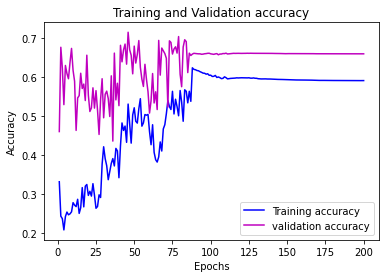

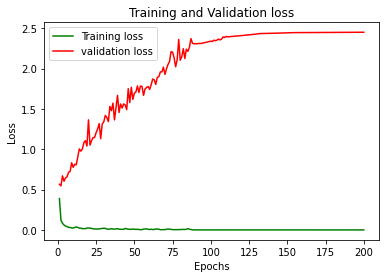

<Figure size 432x288 with 0 Axes>

In [11]:
#@title
# get the model [59, 68, 88, 101, 122, 125, 126, 147]
def get_model(n_inputs, n_outputs):
	clear_session()
	model = Sequential()
	model.add(Dense(256, input_dim=n_inputs, activation='relu'))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
	return model


savepath = "/content/gdrive/MyDrive/BK-DATN/save_model/"
results = evaluate_model(TrainX, TrainY, savepath)

Train : 18000  samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6079744   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6,113,930
Trainable params: 6,113,930
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
197/197 [==============================] - 5s 20ms/step - loss: 0.3467 - categorical_accuracy: 0.4951 - val_loss: 0.5632 - val_categorical_accuracy: 0.6250 - lr: 0.0010
Epoch 2/200
197/197 [==============================] - 2s 12ms/step - loss: 0.1237 - categorical_accuracy:

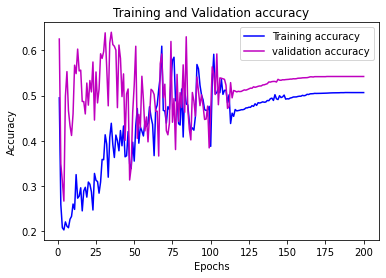

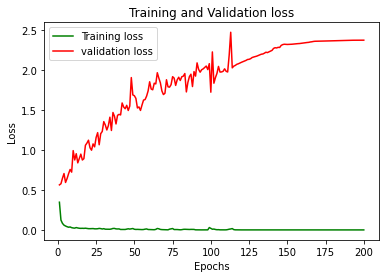

<Figure size 432x288 with 0 Axes>

In [8]:
#@title
# get the model [59, 68, 88, 101, 105, 115, 122, 125, 147, 151]  
def get_model(n_inputs, n_outputs):
	clear_session()
	model = Sequential()
	model.add(Dense(256, input_dim=n_inputs, activation='relu'))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
	return model


savepath = "/content/gdrive/MyDrive/BK-DATN/save_model/"
results = evaluate_model(TrainX, TrainY, savepath)

Train : 20000  samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6079744   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6,113,930
Trainable params: 6,113,930
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
219/219 [==============================] - 5s 20ms/step - loss: 0.2868 - categorical_accuracy: 0.0336 - val_loss: 0.3904 - val_categorical_accuracy: 0.2408 - lr: 0.0010
Epoch 2/200
219/219 [==============================] - 3s 12ms/step - loss: 0.1213 - categorical_accuracy:

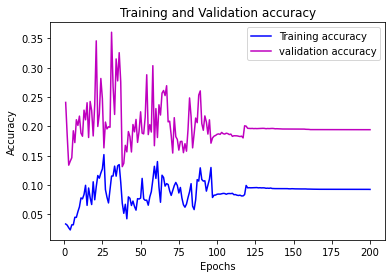

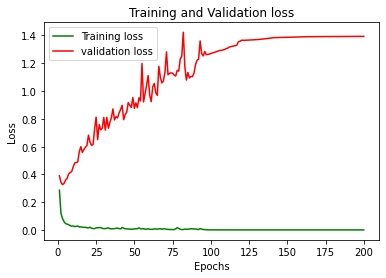

<Figure size 432x288 with 0 Axes>

In [8]:
#@title
# get the model [59, 68, 88, 101, 105, 122, 125, 126, 147, 151]
def get_model(n_inputs, n_outputs):
	clear_session()
	model = Sequential()
	model.add(Dense(256, input_dim=n_inputs, activation='relu'))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
	return model


savepath = "/content/gdrive/MyDrive/BK-DATN/save_model/"
results = evaluate_model(TrainX, TrainY, savepath)

In [ ]:
#@title
# get the model [59, 68, 88, 101, 105, 122, 125, 126, 147, 151]
def get_model(n_inputs, n_outputs):
	clear_session()
	model = Sequential()
	model.add(Dense(256, input_dim=n_inputs, activation='relu'))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
	return model


savepath = "/content/gdrive/MyDrive/BK-DATN/save_model/"
results = evaluate_model(TrainX, TrainY, savepath)

In [ ]:
#@title
# get the model [59, 68, 88, 101, 105, 115, 122, 125, 147, 151]
def get_model(n_inputs, n_outputs):
	clear_session()
	model = Sequential()
	model.add(Dense(256, input_dim=n_inputs, activation='relu'))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
	return model


savepath = "/content/gdrive/MyDrive/BK-DATN/save_model/"
results = evaluate_model(TrainX, TrainY, savepath)

In [ ]:
#@title
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X_train, y_train, savepath):
	results = list()
	n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
	# define evaluation procedure
	# enumerate folds
	# prepare data

	print(f"Train : {len(X_train)}  samples")
	# define model
	model = get_model(n_inputs, n_outputs)
	model_json = model.to_json()
	param = model.count_params()
	model.summary()
	# fit model
	epochs = 200
	batch_size = 32
	with open(f"{savepath}param_{param}_model_eps_{epochs}_bz_{batch_size}.json", "w") as json_file:
			json_file.write(model_json)
		
	callbacks = [ModelCheckpoint(f"{savepath}param_{param}_bz_{batch_size}"+"good_model_loss_{loss: .5f}_acc_{val_accuracy: .4f}"+".hdf5", monitor = "val_accuracy", save_best_only = True, mode = "max"), ReduceLROnPlateau(monitor='loss', patience=20, verbose=1, factor=0.1, min_lr=0.0000001)]
	history = model.fit(X_train, y_train, verbose=1, epochs=epochs, batch_size=batch_size, callbacks = callbacks, validation_split=0.3)
		
	acc_train = history.history['accuracy']
	acc_val = history.history['val_accuracy']
	N_epochs = range(1,epochs+1)
	plt.plot(N_epochs, acc_train, 'b', label='Training accuracy')
	plt.plot(N_epochs, acc_val, 'm', label='validation accuracy')
	plt.title('Training and Validation accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.legend()
	plt.show()
	plt.savefig(f"{savepath}param_{param}_bz_{batch_size}_accuracy.png", dpi = 300)
 
	loss_train = history.history['loss']
	loss_val = history.history['val_loss']
	N_epochs = range(1,epochs+1)
	plt.plot(N_epochs, loss_train, 'g', label='Training loss')
	plt.plot(N_epochs, loss_val, 'r', label='validation loss')
	plt.title('Training and Validation loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.legend()
	plt.show()
	plt.savefig(f"{savepath}param_{param}_bz_{batch_size}_loss.png", dpi = 300)
 
	return 0

In [ ]:
#@title
# get the model
def get_model(n_inputs, n_outputs):
	clear_session()
	model = Sequential()
	model.add(Dense(512, input_dim=n_inputs, activation='relu'))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
	return model
  
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X_train, y_train, savepath):
	results = list()
	n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
	# define evaluation procedure
	# enumerate folds
	# prepare data

	print(f"Train : {len(X_train)}  samples")
	# define model
	model = get_model(n_inputs, n_outputs)
	model_json = model.to_json()
	param = model.count_params()
	model.summary()
	# fit model
	epochs = 20
	batch_size = 4
	with open(f"{savepath}param_{param}_model_eps_{epochs}_bz_{batch_size}.json", "w") as json_file:
			json_file.write(model_json)
		
	callbacks = [ModelCheckpoint(f"{savepath}param_{param}_bz_{batch_size}"+"good_model_loss_{loss: .5f}_acc_{val_categorical_accuracy: .4f}"+".hdf5", monitor = "val_categorical_accuracy", save_best_only = True, mode = "max"), ReduceLROnPlateau(monitor='loss', patience=20, verbose=1, factor=0.1, min_lr=0.0000001)]
	history = model.fit(X_train, y_train, verbose=1, epochs=epochs, batch_size=batch_size, callbacks = callbacks, validation_split=0.2)
		
	acc_train = history.history['categorical_accuracy']
	acc_val = history.history['val_categorical_accuracy']
	N_epochs = range(1,epochs+1)
	plt.plot(N_epochs, acc_train, 'b', label='Training accuracy')
	plt.plot(N_epochs, acc_val, 'm', label='validation accuracy')
	plt.title('Training and Validation accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.legend()
	plt.show()
	plt.savefig(f"{savepath}param_{param}_bz_{batch_size}_accuracy.png", dpi = 300)
 
	loss_train = history.history['loss']
	loss_val = history.history['val_loss']
	N_epochs = range(1,epochs+1)
	plt.plot(N_epochs, loss_train, 'g', label='Training loss')
	plt.plot(N_epochs, loss_val, 'r', label='validation loss')
	plt.title('Training and Validation loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.legend()
	plt.show()
	plt.savefig(f"{savepath}param_{param}_bz_{batch_size}_loss.png", dpi = 300)
 
	return 0

savepath = "/content/gdrive/MyDrive/BK-DATN/save_model/"
results = evaluate_model(TrainX, TrainY, savepath)